In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()

In [ ]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
df = pd.DataFrame(digits.data)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
df['target'] = digits.target

In [ ]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1797 non-null   float64
 1   1       1797 non-null   float64
 2   2       1797 non-null   float64
 3   3       1797 non-null   float64
 4   4       1797 non-null   float64
 5   5       1797 non-null   float64
 6   6       1797 non-null   float64
 7   7       1797 non-null   float64
 8   8       1797 non-null   float64
 9   9       1797 non-null   float64
 10  10      1797 non-null   float64
 11  11      1797 non-null   float64
 12  12      1797 non-null   float64
 13  13      1797 non-null   float64
 14  14      1797 non-null   float64
 15  15      1797 non-null   float64
 16  16      1797 non-null   float64
 17  17      1797 non-null   float64
 18  18      1797 non-null   float64
 19  19      1797 non-null   float64
 20  20      1797 non-null   float64
 21  21      1797 non-null   float64
 22  

In [ ]:
df.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
60,0
61,0
62,0
63,0


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
X = df.drop(columns=['target'])
y = df.target

In [ ]:
model = GridSearchCV(KNeighborsClassifier(),{'n_neighbors':[10,20,30,40,50,60],'metric':['minkowski'],'p':[1,2]},cv=5,return_train_score=False)


In [ ]:
model.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski'],
                         'n_neighbors': [10, 20, 30, 40, 50, 60], 'p': [1, 2]})

In [ ]:
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016613,0.009610,0.267064,0.165318,minkowski,10,1,"{'metric': 'minkowski', 'n_neighbors': 10, 'p'...",0.933333,0.941667,0.969359,0.969359,0.938719,0.950487,0.015639,2
1,0.005793,0.000404,0.038214,0.001608,minkowski,10,2,"{'metric': 'minkowski', 'n_neighbors': 10, 'p'...",0.930556,0.947222,0.969359,0.977716,0.949861,0.954943,0.016773,1
2,0.006691,0.000782,0.098879,0.001661,minkowski,20,1,"{'metric': 'minkowski', 'n_neighbors': 20, 'p'...",0.919444,0.925000,0.952646,0.961003,0.938719,0.939362,0.015800,5
3,0.007018,0.001714,0.048244,0.004648,minkowski,20,2,"{'metric': 'minkowski', 'n_neighbors': 20, 'p'...",0.925000,0.952778,0.966574,0.961003,0.944290,0.949929,0.014567,3
4,0.006645,0.001105,0.097887,0.002806,minkowski,30,1,"{'metric': 'minkowski', 'n_neighbors': 30, 'p'...",0.916667,0.930556,0.941504,0.949861,0.941504,0.936018,0.011455,6
5,0.004457,0.000825,0.033826,0.006206,minkowski,30,2,"{'metric': 'minkowski', 'n_neighbors': 30, 'p'...",0.925000,0.936111,0.938719,0.961003,0.944290,0.941024,0.011799,4
6,0.004819,0.001538,0.073400,0.010461,minkowski,40,1,"{'metric': 'minkowski', 'n_neighbors': 40, 'p'...",0.913889,0.922222,0.924791,0.944290,0.924791,0.925997,0.009984,8
7,0.004797,0.001295,0.031203,0.001336,minkowski,40,2,"{'metric': 'minkowski', 'n_neighbors': 40, 'p'...",0.922222,0.927778,0.930362,0.952646,0.927577,0.932117,0.010601,7
8,0.004304,0.000367,0.067989,0.002876,minkowski,50,1,"{'metric': 'minkowski', 'n_neighbors': 50, 'p'...",0.911111,0.911111,0.919220,0.944290,0.913649,0.919876,0.012561,11
9,0.004862,0.000981,0.039883,0.007042,minkowski,50,2,"{'metric': 'minkowski', 'n_neighbors': 50, 'p'...",0.919444,0.919444,0.927577,0.944290,0.919220,0.925995,0.009684,9


In [ ]:
model.best_score_

0.954942742185082

In [ ]:
model.best_params_

{'metric': 'minkowski', 'n_neighbors': 10, 'p': 2}

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
mod = KNeighborsClassifier(n_neighbors=10,p=2,metric='minkowski')
mod.fit(X_train,y_train)
y_pred = mod.predict(X_test)
mod.score(X_test,y_test)

0.9833333333333333

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test,y_pred)

Text(50.722222222222214, 0.5, 'Actual')

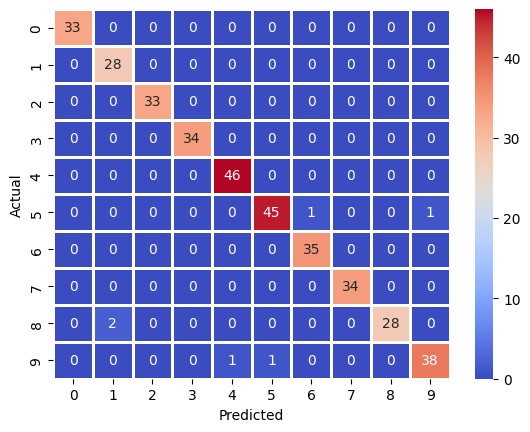

In [ ]:
sns.heatmap(cm,annot=True,fmt='d',cmap='coolwarm',linewidths=2)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.96      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      1.00      1.00        34
           8       1.00      0.93      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

